In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("/content/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
import seaborn as sns

In [14]:
for i in df.columns:
  print(i,df.loc[df[i]==0].shape[0])

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


In [16]:
for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']:
  df[i]=df[i].replace(0,df[i].mean())

In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']:
  print(i,df.loc[df[i]==0].shape[0])

Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0


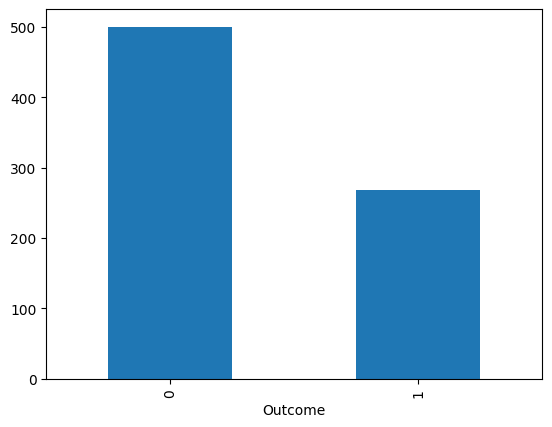

In [28]:
ax=df["Outcome"].value_counts().plot(kind="bar")
plt.show()

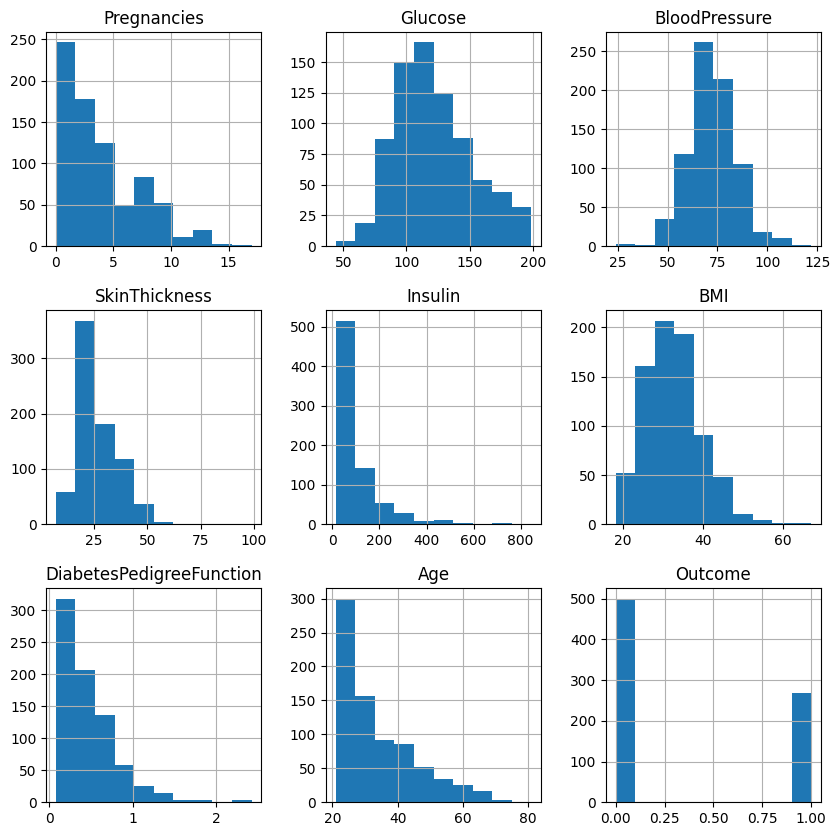

In [31]:
# histogram of each feature
df.hist(bins=10,figsize=(10,10))
plt.show()

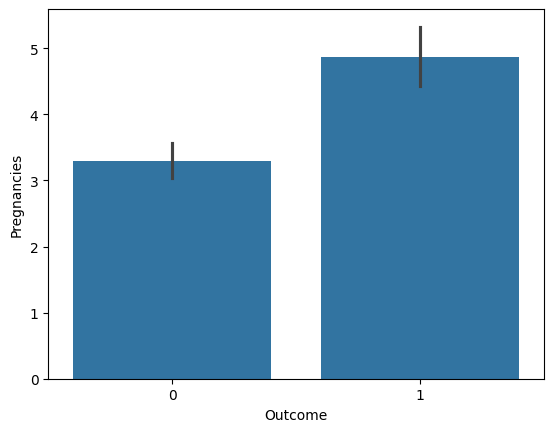

In [33]:
sns.barplot(y=df["Pregnancies"],x=df["Outcome"])
plt.show()

<Axes: xlabel='Outcome'>

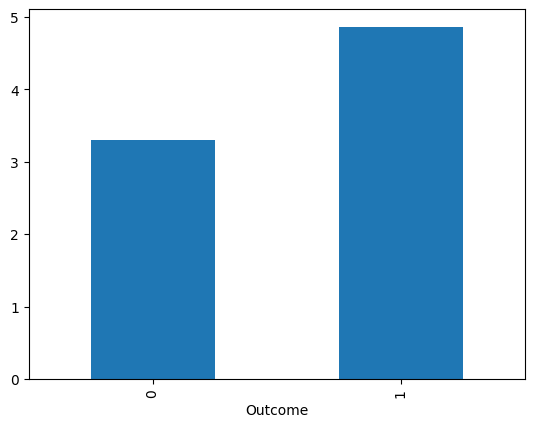

In [35]:
df.groupby("Outcome")["Pregnancies"].mean().plot(kind="bar")

<Axes: >

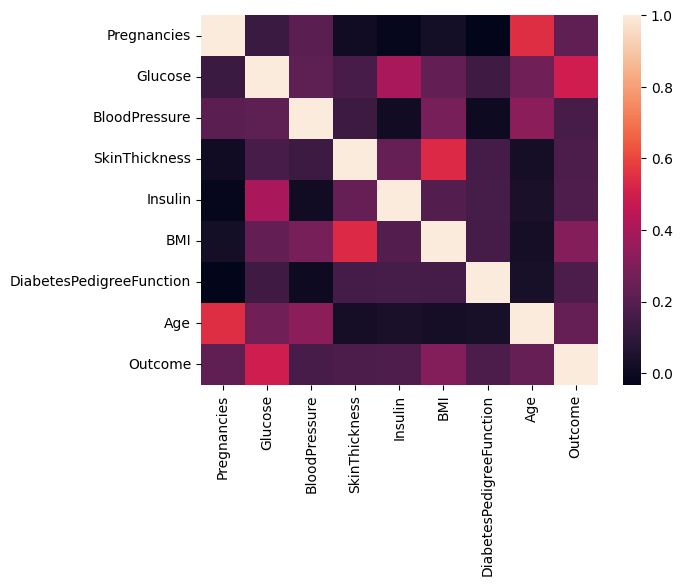

In [37]:
sns.heatmap(df.corr())

In [38]:
target_name='Outcome'

y= df[target_name]#given predictions
X=df.drop(target_name,axis=1)#dropping the Outcome column and keeping all other columns as X

In [39]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X)
SSX=scaler.transform(X)

In [41]:
X_train, X_test, y_train, y_test= train_test_split(SSX,y,test_size=0.2,stratify=y,random_state=2)#splitting data in 80% train, 20%test

In [42]:
X_train.shape,y_train.shape

((614, 8), (614,))

In [43]:
sv=SVC()
sv.fit(X_train,y_train)

SVC()

In [48]:
ypred=sv.predict(X_test)

In [45]:
sv.score(X_test,y_test)

0.7532467532467533

In [46]:
sv.score(X_train,y_train)

0.8355048859934854

In [49]:
print(accuracy_score(ypred,y_test))

0.7532467532467533


In [50]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [51]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [59]:
pred=log_reg.predict(X_train)

In [60]:
print(accuracy_score(pred,y_train))

0.7850162866449512


In [53]:
log_reg.score(X_train,y_train)*100

78.50162866449512

In [55]:
y_pred= log_reg.predict(X_test)

In [57]:
log_reg.score(X_test,y_test)

0.7597402597402597

In [58]:
print(accuracy_score(y_pred,y_test))

0.7597402597402597
